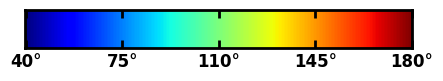

In [ ]:
# @title Colorbars for PyPOLAR { vertical-output: true, form-width: "500px", display-mode: "form" }

#
# The colorbars produced in this code correspond to the ones used in the software
# Polarimetry Analysis https://www.fresnel.fr/polarimetry/
#
#
# BSD 2-Clause License
#
# Copyright (c) 2024, Cristel Chandre (cristel.chandre@cnrs.fr)
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, this
#   list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice,
#   this list of conditions and the following disclaimer in the documentation
#   and/or other materials provided with the distribution.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
# FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
# DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
# SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
# CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from colorcet import m_colorwheel

variable = "Psi" # @param ["Rho", "Rho_contour", "Rho_angle", "Psi", "Eta", "S2", "S4", "S_SHG"]
colorbar_type = "horizontal" # @param ["vertical", "horizontal", "polar90", "polar180"]
color = "k" # @param ["k", "w"] {allow-input: true}
label_side = "bottom" # @param ["none", "right", "left", "top", "bottom"]
colorblind = False # @param ["False", "True"] {type:"raw"}
nbr_ticks = 5 # @param {type:"integer"}
figsize = 5 # @param {type:"integer"}
aspect_ratio = 20 # @param {type:"integer"}
font_size = 12 # @param {type:"integer"}
font = "DejaVu Sans" # @param ["DejaVu Sans", "DejaVu Sans Mono", "Liberation Sans", "Liberation Sans Narrow", "STIXGeneral"]
font_style = "bold" # @param ["bold", "normal"]
save_extension = ".tif" # @param [".png", ".tif"]
resolution = 150 # @param ["150", "300", "600"] {type:"raw", allow-input: true}


mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = font_size
mpl.rcParams['xtick.labelsize'] = font_size
mpl.rcParams['ytick.labelsize'] = font_size
mpl.rcParams['axes.edgecolor'] = color
mpl.rcParams['font.family'] = font
mpl.rcParams['font.sans-serif'] = font
mpl.rcParams['font.weight'] = font_style

dict_vars = {'Rho': [['vertical', 'horizontal', 'polar180'], r'\rho', ['hsv', m_colorwheel], (0, 180)],
            'Rho_contour': [['vertical', 'horizontal', 'polar180', 'polar90'], r'$\rho_c$', ['hsv', m_colorwheel], (0, 180)],
            'Rho_angle': [['vertical', 'horizontal', 'polar180', 'polar90'], r'$\rho_a$', ['hsv', m_colorwheel], (0, 180)],
            'Psi': [['vertical', 'horizontal'], '$\psi$', ['jet', 'viridis'], (40, 180)],
            'Eta': [['vertical', 'horizontal', 'polar90'], '$\eta$', ['plasma', 'plasma'], (0, 90)],
            'S2': [['vertical', 'horizontal'], '$S_2$', ['jet', 'viridis'], (0, 1)],
            'S4': [['vertical', 'horizontal'], '$S_4$', ['jet', 'viridis'], (-1, 1)],
            'S_SHG': [['vertical', 'horizontal'], '$S_\mathrm{SHG}$', ['jet', 'viridis'], (-1, 1)]}

list_vars = [key for key in dict_vars.keys()]

if variable not in list_vars:
    raise ValueError(f"Colorbar for var {variable} is not available")
data = dict_vars.get(variable)
if colorbar_type not in data[0]:
    raise ValueError(f"Colorbar type {colorbar_type} for var {variable} is not available")

colormap = data[2][1] if colorblind else data[2][0]
theta_setup = ('N', -1) if variable == 'Eta' else ('E', 1)
var_range = data[3]
if colorbar_type == 'polar90':
    var_range = (0, 90)
if colorbar_type.startswith('polar'):
    aspect_ratio = 1
else:
    aspect_ratio = aspect_ratio if colorbar_type=='vertical' else 1 / aspect_ratio
ticks = np.linspace(*var_range, nbr_ticks)
if not variable.startswith('S'):
    labels = [str(int(_)) + u"\u00b0" for _ in ticks]
else:
    labels = [f"{_:.1f}" for _ in ticks]
if not colorbar_type.startswith('polar'):
    ticks = (ticks - np.amin(ticks)) / np.ptp(ticks)
ticks  = [ticks, [] if label_side is None else labels]

if not colorbar_type.startswith('polar'):
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.tick_params('both', colors=color, width=2, length=6, direction='in')
if colorbar_type == 'vertical':
    if label_side == 'right':
        ax.tick_params(labelright=True, labelleft=False)
    gradient = gradient.T
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)
    ax.tick_params(axis='y', which='both', right=True, left=True)
    extent = (0, 1 if variable.startswith('S') else 255, var_range[0], var_range[1])
    ax.set_yticks(ticks[0] / np.amax(ticks[0]), labels=ticks[1])
    ax.pcolormesh(np.linspace(0, 1, 2), np.linspace(0, 1, 256), gradient, cmap=colormap)
    ax.set_aspect(aspect_ratio)
elif colorbar_type == 'horizontal':
    if label_side == 'top':
        ax.tick_params(labeltop=True, labelbottom=False)
    ax.tick_params(axis='x', which='both', bottom=True, top=True)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
    ax.set_xticks(ticks[0] / np.amax(ticks[0]), labels=ticks[1])
    ax.pcolormesh(np.linspace(0, 1, 256), np.linspace(0, 1, 2), gradient, cmap=colormap)
    ax.set_aspect(aspect_ratio)
elif colorbar_type.startswith('polar'):
    fig, ax = plt.subplots(figsize=(figsize, figsize), subplot_kw=dict(projection="polar"))
    ax.set_theta_zero_location(theta_setup[0])
    ax.set_theta_direction(theta_setup[1])
    ax.set_thetamin(var_range[0])
    ax.set_thetamax(var_range[1])
    outer_radius, rorigin = 20, -10
    x, y = np.meshgrid(np.linspace(outer_radius, -outer_radius, 2**10), np.linspace(0, outer_radius, 2**10))
    theta, rho = np.arctan2(y, x), np.sqrt(x**2 + y**2)
    ax.pcolormesh(theta, rho, theta, cmap=colormap)
    ax.set_rticks([])
    ax.set_rorigin(rorigin)
    if colorbar_type == 'polar180' and label_side != 'none':
        ticks[1][-1] = ticks[1][-1] + "   "
    if theta_setup[1] == -1 and label_side != 'none':
        ticks[1][-1] = "   " + ticks[1][-1]
    ax.set_thetagrids(ticks[0], labels=ticks[1], color=color, horizontalalignment='center')
    ax.grid(False)
    for t in np.deg2rad(ticks[0]):
        ax.plot([t, t], [outer_radius, outer_radius - 5], lw=2, color=color)
        ax.plot([t, t], [0, 5], lw=2, color=color)
    ax.set_rmax(outer_radius)
plt.savefig(variable + "Colorbar" + save_extension, dpi=resolution, transparent=True, bbox_inches='tight')
plt.show()
